# Compare Machine Learning Algorithms
* When you work on a machine learning project, you often end up with multiple good models to choose from. Each model will have different performance characteristics. Using resampling methods like cross-validation, you can get an estimate for how accurate each model may be on unseen data. You need to be able to use these estimates to choose one or two best models from the suite of models that you have created.
* When you have a new dataset, it is a good idea to visualize the data using different techniques in order to look at the data from different perspectives. The same idea applies to model selection. You should use a number of different ways of looking at the estimated accuracy of your machine learning algorithms in order to choose the one or two algorithm to finalize. A way to do this is to use visualization methods to show the average accuracy, variance and other properties of the distribution of model accuracies. In the next section you will discover exactly how you can do that in Python with scikit-learn.

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.695215 (0.055730)
NB: 0.755178 (0.042766)
SVM: 0.651025 (0.072141)


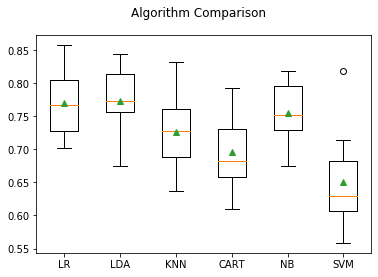

In [2]:
# Compare Algorithms
%matplotlib inline
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare models
models = []
models.append(('LR', LogisticRegression(solver = 'liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma = 'auto')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results, showmeans = True) 
ax.set_xticklabels(names) 
pyplot.show()

### Fun Time: which base classifier will you choose? (1) LR (2) LDA (3) KNN (4) NB (5) SVM

* Let us now keep logisitic regression and linear discriminant analysis classifiers and compare their performance with various ensemble methods

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
Bagging: 0.761603 (0.076191)
RF: 0.769481 (0.062820)
AdaBoost: 0.760458 (0.054438)


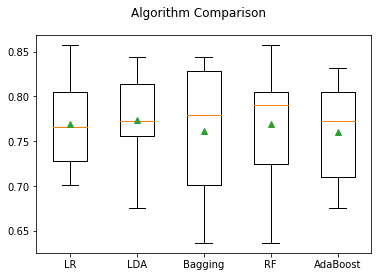

In [3]:
# Compare Algorithms
%matplotlib inline
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# load dataset
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare models
models = []
models.append(('LR', LogisticRegression(solver = 'liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
#
seed = 7
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees) 
models.append(('Bagging', model))
#
max_features = 3
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features) 
models.append(('RF', model))
#
num_trees = 30
model = AdaBoostClassifier(n_estimators=num_trees)
models.append(('AdaBoost', model))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results, showmeans = True) 
ax.set_xticklabels(names) 
pyplot.show()

### Fun Time: which classifier will you choose? (1) LR (2) LDA (3) Bagging (4) RF (5) AdaBoost